# Exploring "Fordgobike" data

### by Mostafa Mohamed Mohamed Imam

## Investigation Overview

> this presentation aims at displaying the effect of free time on trip stats of ford go bike dataset

## Dataset Overview

> the dataset provides info about trips made by ford go bike's users such as duration, birth year, start and stop stations with ids and coordinates for each station for each trip as well as the start time of each trip from year to minutes and seconds

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.dropna(inplace=True)

# converting the 'start_time' column to datetime format to extract useful information of interst
df['start_time'] = pd.to_datetime(df['start_time'])

# exctracting months, days(monthly format), days(weekly format) and start hours
df.insert(1, 'current_year' , df['start_time'].dt.year)
df.insert(1, 'day_of_month' , df['start_time'].dt.day)
df.insert(1, 'day_of_week' , df['start_time'].dt.day_name())
df.insert(1, 'start_hour' , df['start_time'].dt.hour)
df.insert(1, 'duration_min' , round(df['duration_sec']/60, 2))

# convert the member_birth_year column to int 
df['member_birth_year'] = df['member_birth_year'].astype(int)

# create a column for start and stop station combinations 
df['start_and_stop'] = df['start_station_name'] + ' to ' + df['end_station_name']

# create a column for the calculated age of each member
df['age'] = df['current_year'] - df['member_birth_year']

# drop rows with ages over 74
df.drop(df.query('age > 74').index, axis=0, inplace=True)

def age_grouping(age_groups_arr):
    
    '''
    takes in an array of ages (age_groups_arr) to be used as point stops for creating age group columns
    parameters : age_groups_array (arr)
    returns : ages (arr), edited dataframe
    '''
    
    global ages
    n = len(age_groups_arr)-1
    ages = age_groups_arr
    df['age_group'] = df['age'] * 0
    
    for i in range (n):  
        df['age{}to{}'.format(ages[i], ages[i+1])] = df['age'] * 0
        df['age{}to{}'.format(ages[i], ages[i+1])].mask((df['age'] >= ages[i]) & (df['age'] < ages[i+1]), 1, inplace=True)
        df['age_group'].mask((df['age'] >= ages[i]) & (df['age'] < ages[i+1]), 'age{}to{}'.format(ages[i], ages[i+1]), inplace=True)
    return ages

age_grouping([10, 20, 30, 40, 50, 60, 70, 80])

[10, 20, 30, 40, 50, 60, 70, 80]

## (Visualization 1)

> this visualization shows the count of trips made in each day of the week and it shows that most trips made are during the middle of the week and least trips made are in weekend days which suggests the service is used more for commute.

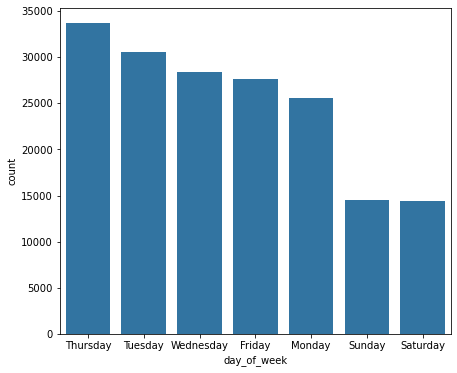

In [3]:
plt.figure(figsize=(7,6))
day_freq_order = df['day_of_week'].value_counts().index
sb.countplot(data = df, x = 'day_of_week', color = sb.color_palette()[0], order = day_freq_order);

## (Visualization 2)

> this visualization shows the amount of trips made for each age group and the proportions of each age group and the peak around 20s to 40s suggests most users indeed have more work that rquires commute in contrast to younger ages who have more free time or o9lder ages which are typically in more stable positions and jobs that require less commute which further enforces the justification for the peak of trips in the middle of the week in visualization 1.

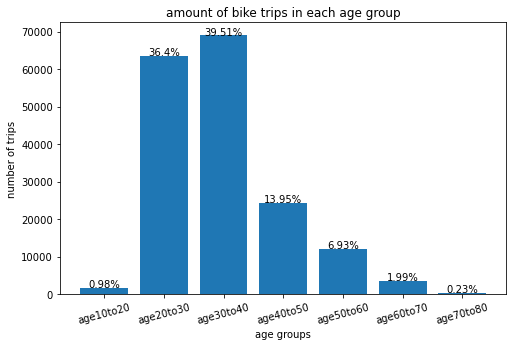

In [4]:
age_groups = df.columns.tolist()[24:]
age_amounts = []
age_props = []

for i in range (len(ages)-1):
    age_amounts.append(df['age{}to{}'.format(ages[i], ages[i+1])].sum())
    age_props.append(round(df['age{}to{}'.format(ages[i], ages[i+1])].sum() / df.shape[0], 4))

plt.figure(figsize = (8,5))
plt.bar(data = df, x=age_groups, height = age_amounts);
plt.xticks(rotation = 15);
plt.title("amount of bike trips in each age group")
plt.xlabel("age groups")
plt.ylabel("number of trips")

for i in range(len(age_groups)):
    plt.text(i, age_amounts[i]+150, '{}%'.format(round(age_props[i]*100, 2)), ha = 'center')


## (Visualization 3)
> this visualization shows the relationship between age groups and trip duration, we can see that ages under 20 -who have more free time have the peak of average trip duration with great variability as indicated by the lines of the bars, and older ages do make longer trips in terms of duration as well which also enforces the thoery of the effect of free time for age groups in their commuting durations, since younger people have more free time and older ones have more stable jobs and can afford to make longer trips in terms of duration for other purposes than work and the great variabililty in ages over 70 shows that -the varibility of trip purposes-, and in general the variability in trip durations increases with age starting from the 20 to 30 age group.

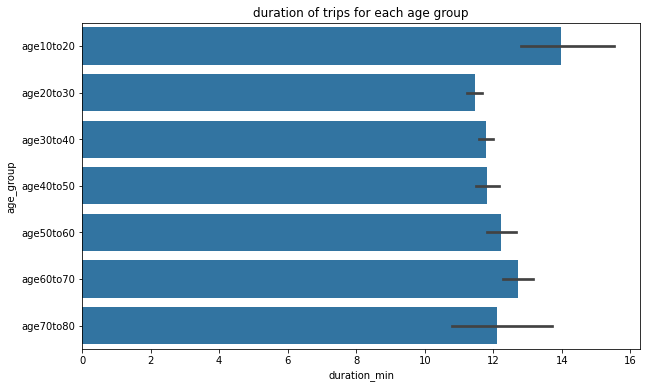

In [5]:
age_order = ['age10to20', 'age20to30', 'age30to40', 'age40to50', 'age50to60', 'age60to70', 'age70to80']
plt.figure(figsize = (10,6))
sb.barplot(x = 'duration_min', y='age_group' , data = df, color = sb.color_palette()[0], order = age_order);
plt.title("duration of trips for each age group");

## (Visualization 4)
> this visualization shows the relationship between age groups and trip durations across week days, it can be seen that trips made in weekend days - sun, sat- tend to last longer and have more variability as indicated by the lines on the bars especially for the 10 to 20 age which generally has more free time, and with minor exceptions we can see that the varibality of durations comes from weekends and increases with age starting from 20 to 30 group which also further enforces the effect of free time on the purposes of the trips and so on their duration.

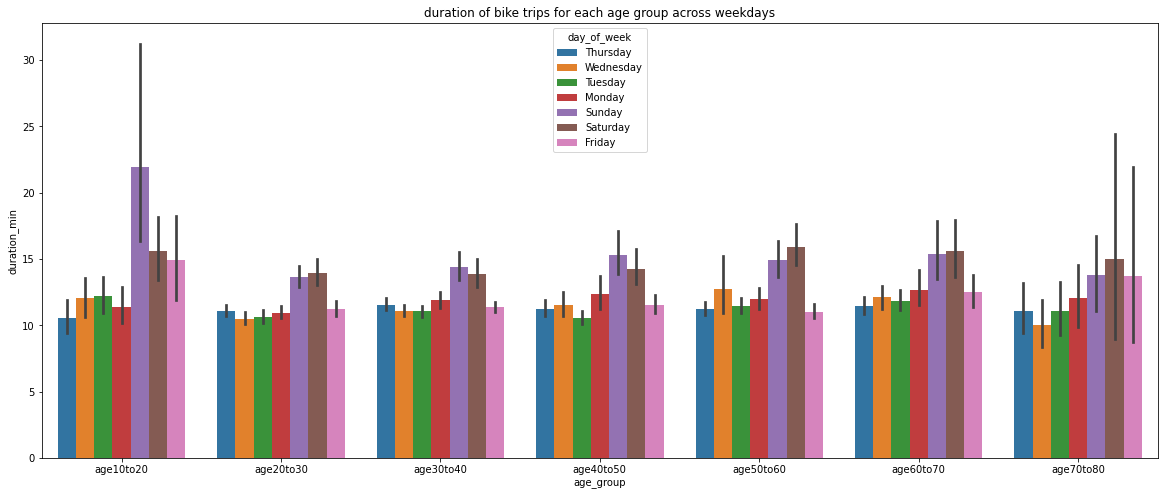

In [6]:
plt.figure(figsize = (20,8))
sb.barplot(x = 'age_group', y = 'duration_min', hue = 'day_of_week', data = df, order = age_order);
plt.title("duration of bike trips for each age group across weekdays");